In [4]:
!export HTTP_PROXY="http://10.68.69.53:80"
!export HTTPS_PROXY="http://10.68.69.53:80"

!export http_proxy="http://10.68.69.53:80"
!export https_proxy="http://10.68.69.53:80"


In [1]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2021-07-15 13:51:27--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Connecting to 10.68.69.53:80... connected.
Proxy request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip.1’

100%[======================================>] 248,100,043 43.8MB/s   in 5.9s   

2021-07-15 13:51:34 (40.2 MB/s) - ‘tiny-imagenet-200.zip.1’ saved [248100043/248100043]



In [ ]:
!git clone https://github.com/RajamannarAanjaram/EVA-6.git

In [ ]:
!pip install -U albumentations
!pip install -U torchsummary
!pip install -U grad-cam
!pip install -U ttach
!pip install -U torch-lr-finder

In [1]:
import sys
sys.path.append("../../EVA-6/") # for servre

sys.path.append("./EVA-6/")# for local

In [2]:
from utils.DataLoader import Loader,mean_std,DeNorm
from src.models import *
from src.optimise import *
from src.plots import Plots
import matplotlib.pyplot as plt
from utils.helper import get_mean_std
from torch_lr_finder import LRFinder
from torch.optim.lr_scheduler import OneCycleLR


from pytorch_grad_cam import GradCAM, XGradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image


# import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [3]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.utils.data as data

In [4]:
val_dir = './tiny-imagenet-200/val'
val_dataset = datasets.ImageFolder(val_dir, transform=transforms.ToTensor())
val_loader = data.DataLoader(val_dataset, batch_size=32)
print("Loaded: %s", val_dir)

Loaded: %s ./tiny-imagenet-200/val


In [5]:
loader = Loader(batch_size=128,data="TINYIMAGENET")
train_transform,test_transform = loader.transform()
train_data,test_data = loader.Loader(train_transform,test_transform, cuda=True)

======> Computing mean and std of dataset


100%|██████████| 781/781 [00:41<00:00, 19.04it/s]


## Model Creation & Training

In [6]:
model, summary = ModelLoader.modelsummary(version=[2,2,2,2],inputsize=(3,64,64),num_classes=200)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [7]:
use_cuda = torch.cuda.is_available()
device = 'cuda:0' if use_cuda else 'cpu'

In [8]:
(train_acc, train_losses, test_acc, test_losses), modelfinal = learner(model,train_data,test_data,
                                                                       epochs=50,optimiser= 'Adam',
                                                                       scheduler=False,device = device)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 1:


Loss=4.791640281677246 Batch_id=781 Accuracy=4.32: 100%|██████████| 782/782 [01:35<00:00,  8.23it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 6.6570, Accuracy: 43/10000 (0.43%)

Epoch 2:


Loss=3.7697792053222656 Batch_id=781 Accuracy=9.60: 100%|██████████| 782/782 [01:35<00:00,  8.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 6.5831, Accuracy: 212/10000 (2.12%)

Epoch 3:


Loss=4.1085734367370605 Batch_id=781 Accuracy=13.68: 100%|██████████| 782/782 [01:36<00:00,  8.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 7.5696, Accuracy: 41/10000 (0.41%)

Epoch 4:


Loss=3.6955928802490234 Batch_id=781 Accuracy=16.87: 100%|██████████| 782/782 [01:35<00:00,  8.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 7.2038, Accuracy: 91/10000 (0.91%)

Epoch 5:


Loss=3.7882609367370605 Batch_id=781 Accuracy=19.46: 100%|██████████| 782/782 [01:35<00:00,  8.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 7.7982, Accuracy: 60/10000 (0.60%)

Epoch 6:


Loss=3.2701330184936523 Batch_id=781 Accuracy=22.02: 100%|██████████| 782/782 [01:35<00:00,  8.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 7.9997, Accuracy: 47/10000 (0.47%)

Epoch 7:


Loss=3.6825156211853027 Batch_id=781 Accuracy=23.87: 100%|██████████| 782/782 [01:35<00:00,  8.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 8.2171, Accuracy: 43/10000 (0.43%)

Epoch 8:


Loss=3.2146620750427246 Batch_id=781 Accuracy=25.65: 100%|██████████| 782/782 [01:35<00:00,  8.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 8.0219, Accuracy: 54/10000 (0.54%)

Epoch 9:


Loss=3.3262734413146973 Batch_id=781 Accuracy=27.33: 100%|██████████| 782/782 [01:35<00:00,  8.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 8.1146, Accuracy: 74/10000 (0.74%)

Epoch 10:


Loss=3.4270644187927246 Batch_id=781 Accuracy=29.02: 100%|██████████| 782/782 [01:35<00:00,  8.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 8.3562, Accuracy: 35/10000 (0.35%)

Epoch 11:


Loss=3.142592191696167 Batch_id=781 Accuracy=30.17: 100%|██████████| 782/782 [01:35<00:00,  8.22it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 7.8664, Accuracy: 83/10000 (0.83%)

Epoch 12:


Loss=2.6232500076293945 Batch_id=781 Accuracy=31.30: 100%|██████████| 782/782 [01:35<00:00,  8.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 8.3764, Accuracy: 58/10000 (0.58%)

Epoch 13:


Loss=3.1652493476867676 Batch_id=781 Accuracy=32.59: 100%|██████████| 782/782 [01:35<00:00,  8.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.3351, Accuracy: 29/10000 (0.29%)

Epoch 14:


Loss=2.758798599243164 Batch_id=781 Accuracy=33.66: 100%|██████████| 782/782 [01:35<00:00,  8.20it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.1007, Accuracy: 38/10000 (0.38%)

Epoch 15:


Loss=3.1397650241851807 Batch_id=781 Accuracy=34.72: 100%|██████████| 782/782 [01:36<00:00,  8.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.1557, Accuracy: 31/10000 (0.31%)

Epoch 16:


Loss=3.417494773864746 Batch_id=781 Accuracy=35.66: 100%|██████████| 782/782 [01:35<00:00,  8.19it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.3891, Accuracy: 30/10000 (0.30%)

Epoch 17:


Loss=3.3322737216949463 Batch_id=781 Accuracy=36.71: 100%|██████████| 782/782 [01:36<00:00,  8.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 8.9007, Accuracy: 58/10000 (0.58%)

Epoch 18:


Loss=2.9679696559906006 Batch_id=781 Accuracy=37.40: 100%|██████████| 782/782 [01:35<00:00,  8.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.2217, Accuracy: 29/10000 (0.29%)

Epoch 19:


Loss=2.251391887664795 Batch_id=781 Accuracy=38.15: 100%|██████████| 782/782 [01:35<00:00,  8.16it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.3111, Accuracy: 34/10000 (0.34%)

Epoch 20:


Loss=2.4217350482940674 Batch_id=781 Accuracy=39.19: 100%|██████████| 782/782 [01:35<00:00,  8.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.3729, Accuracy: 40/10000 (0.40%)

Epoch 21:


Loss=3.449260711669922 Batch_id=781 Accuracy=39.95: 100%|██████████| 782/782 [01:35<00:00,  8.19it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.3157, Accuracy: 40/10000 (0.40%)

Epoch 22:


Loss=2.1522395610809326 Batch_id=781 Accuracy=40.79: 100%|██████████| 782/782 [01:35<00:00,  8.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.5754, Accuracy: 40/10000 (0.40%)

Epoch 23:


Loss=2.245272159576416 Batch_id=781 Accuracy=41.17: 100%|██████████| 782/782 [01:35<00:00,  8.19it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.5874, Accuracy: 30/10000 (0.30%)

Epoch 24:


Loss=2.279550552368164 Batch_id=781 Accuracy=42.13: 100%|██████████| 782/782 [01:35<00:00,  8.18it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.6868, Accuracy: 35/10000 (0.35%)

Epoch 25:


Loss=2.8508543968200684 Batch_id=781 Accuracy=42.93: 100%|██████████| 782/782 [01:35<00:00,  8.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.6515, Accuracy: 34/10000 (0.34%)

Epoch 26:


Loss=2.558565378189087 Batch_id=781 Accuracy=43.40: 100%|██████████| 782/782 [01:35<00:00,  8.21it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.2155, Accuracy: 30/10000 (0.30%)

Epoch 27:


Loss=2.688124895095825 Batch_id=781 Accuracy=44.16: 100%|██████████| 782/782 [01:35<00:00,  8.19it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.5950, Accuracy: 44/10000 (0.44%)

Epoch 28:


Loss=2.611909866333008 Batch_id=781 Accuracy=44.60: 100%|██████████| 782/782 [01:36<00:00,  8.10it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.7228, Accuracy: 47/10000 (0.47%)

Epoch 29:


Loss=2.7099084854125977 Batch_id=781 Accuracy=45.16: 100%|██████████| 782/782 [01:36<00:00,  8.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.3887, Accuracy: 56/10000 (0.56%)

Epoch 30:


Loss=2.707061290740967 Batch_id=781 Accuracy=45.70: 100%|██████████| 782/782 [01:35<00:00,  8.19it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.6037, Accuracy: 45/10000 (0.45%)

Epoch 31:


Loss=2.866732358932495 Batch_id=781 Accuracy=46.51: 100%|██████████| 782/782 [01:36<00:00,  8.14it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.8979, Accuracy: 39/10000 (0.39%)

Epoch 32:


Loss=2.3848257064819336 Batch_id=781 Accuracy=46.83: 100%|██████████| 782/782 [01:35<00:00,  8.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.8227, Accuracy: 38/10000 (0.38%)

Epoch 33:


Loss=2.3992748260498047 Batch_id=781 Accuracy=47.60: 100%|██████████| 782/782 [01:35<00:00,  8.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 9.9567, Accuracy: 45/10000 (0.45%)

Epoch 34:


Loss=1.975061297416687 Batch_id=781 Accuracy=47.94: 100%|██████████| 782/782 [01:38<00:00,  7.95it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.0574, Accuracy: 37/10000 (0.37%)

Epoch 35:


Loss=2.666930675506592 Batch_id=781 Accuracy=48.52: 100%|██████████| 782/782 [01:35<00:00,  8.18it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.2396, Accuracy: 48/10000 (0.48%)

Epoch 36:


Loss=2.2773711681365967 Batch_id=781 Accuracy=49.17: 100%|██████████| 782/782 [01:35<00:00,  8.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.8159, Accuracy: 41/10000 (0.41%)

Epoch 37:


Loss=2.180499792098999 Batch_id=781 Accuracy=49.38: 100%|██████████| 782/782 [01:35<00:00,  8.18it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.6043, Accuracy: 35/10000 (0.35%)

Epoch 38:


Loss=2.280543327331543 Batch_id=781 Accuracy=49.94: 100%|██████████| 782/782 [01:36<00:00,  8.12it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.1413, Accuracy: 47/10000 (0.47%)

Epoch 39:


Loss=2.213228225708008 Batch_id=781 Accuracy=50.28: 100%|██████████| 782/782 [01:35<00:00,  8.16it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.2399, Accuracy: 50/10000 (0.50%)

Epoch 40:


Loss=2.4598333835601807 Batch_id=781 Accuracy=50.63: 100%|██████████| 782/782 [01:35<00:00,  8.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.2917, Accuracy: 39/10000 (0.39%)

Epoch 41:


Loss=2.0917835235595703 Batch_id=781 Accuracy=51.35: 100%|██████████| 782/782 [01:35<00:00,  8.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.1466, Accuracy: 45/10000 (0.45%)

Epoch 42:


Loss=2.104494094848633 Batch_id=781 Accuracy=51.65: 100%|██████████| 782/782 [01:36<00:00,  8.12it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.1739, Accuracy: 48/10000 (0.48%)

Epoch 43:


Loss=2.0186305046081543 Batch_id=781 Accuracy=52.13: 100%|██████████| 782/782 [01:36<00:00,  8.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.7786, Accuracy: 36/10000 (0.36%)

Epoch 44:


Loss=2.2770321369171143 Batch_id=781 Accuracy=52.71: 100%|██████████| 782/782 [01:36<00:00,  8.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.6545, Accuracy: 37/10000 (0.37%)

Epoch 45:


Loss=2.1452207565307617 Batch_id=781 Accuracy=52.95: 100%|██████████| 782/782 [01:35<00:00,  8.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.7573, Accuracy: 48/10000 (0.48%)

Epoch 46:


Loss=2.0779409408569336 Batch_id=781 Accuracy=53.37: 100%|██████████| 782/782 [01:35<00:00,  8.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.6767, Accuracy: 43/10000 (0.43%)

Epoch 47:


Loss=2.5349180698394775 Batch_id=781 Accuracy=53.90: 100%|██████████| 782/782 [01:35<00:00,  8.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.5282, Accuracy: 44/10000 (0.44%)

Epoch 48:


Loss=1.735898494720459 Batch_id=781 Accuracy=54.25: 100%|██████████| 782/782 [01:35<00:00,  8.16it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.9651, Accuracy: 35/10000 (0.35%)

Epoch 49:


Loss=1.8658931255340576 Batch_id=781 Accuracy=54.40: 100%|██████████| 782/782 [01:35<00:00,  8.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 10.2475, Accuracy: 52/10000 (0.52%)

Epoch 50:


Loss=1.8779017925262451 Batch_id=781 Accuracy=54.85: 100%|██████████| 782/782 [01:35<00:00,  8.17it/s]



Test set: Average loss: 11.1428, Accuracy: 37/10000 (0.37%)



## Loss Curves

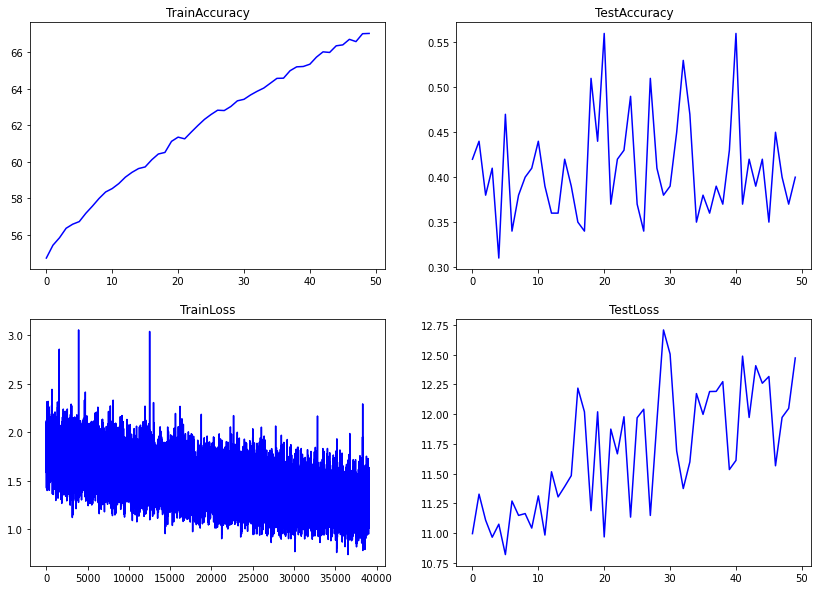

In [9]:
Plots.stat_graph(train_acc, train_losses, test_acc, test_losses)